In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/src")
import helpers as hlp

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Set plot sizes
SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
BIGGEST_SIZE = 28

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

# Load & Merge CSV Data

In [4]:
aws_data_dir = '../data/web_scraped/aws_final/'

# Use helper function to load and merge CSVs from folders in above dir
df_all_hotels = hlp.merge_csv_mult_dir(aws_data_dir)

Folders: ['Tokyo-Kanto-pg1', 'Honolulu-Hawaii.pg1', 'Honolulu-Hawaii.pg4', 'Honolulu-Hawaii.pg3', 'Honolulu-Hawaii.pg2', 'New_York_City-New_York-pg1']


In [5]:
df_all_hotels.shape

(212155, 10)

In [6]:
df_all_hotels.head()

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder
0,749389994,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"March 5, 2020",Consistent service with my past Aman hotel exp...,"Sunnyvale, California",4,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
1,749264661,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"March 5, 2020",Stayed for 3 days and everything at Aman is pe...,"Vancouver, Canada",6,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
2,746956250,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 23, 2020",Although I live in Tokyo but I decided to take...,"Tokyo, Japan",53,4.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
3,745398599,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 16, 2020",An outstanding stay in a beautiful Aman in dow...,"Singapore, Singapore",5,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1
4,743365715,https://www.tripadvisor.com/Hotel_Review-g1412...,Aman Tokyo,"February 6, 2020",Stayed here for 2 nights (second time after 3 ...,"Singapore, Singapore",38,5.0,Aman_Tokyo-Otemachi_Chiyoda_Tokyo_Tokyo_Prefec...,Tokyo-Kanto-pg1


In [7]:
df_all_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212155 entries, 0 to 212154
Data columns (total 10 columns):
review_id        212155 non-null int64
url              212155 non-null object
hotel_name       212155 non-null object
review_date      212155 non-null object
review_body      212155 non-null object
user_location    184157 non-null object
helpful_vote     212155 non-null int64
rating           212155 non-null float64
csv              212155 non-null object
folder           212155 non-null object
dtypes: float64(1), int64(2), object(7)
memory usage: 16.2+ MB


In [8]:
# Check for duplicate rows
dup_rows = df_all_hotels[df_all_hotels.duplicated()].count()
print('Number of duplicate rows:\n\n{}'.format(dup_rows))

Number of duplicate rows:

review_id        0
url              0
hotel_name       0
review_date      0
review_body      0
user_location    0
helpful_vote     0
rating           0
csv              0
folder           0
dtype: int64


In [9]:
# Get count, pct, and type of missing data (per column)
hlp.get_nulls(df_all_hotels)

,Total,Percent,Type
user_location,27998,0.13197,object
folder,0,0.00000,object
csv,0,0.00000,object
rating,0,0.00000,float64
helpful_vote,0,0.00000,int64
review_body,0,0.00000,object
review_date,0,0.00000,object
hotel_name,0,0.00000,object
url,0,0.00000,object
review_id,0,0.00000,int64


# Clean & Prep Data

In [10]:
df_all_hotels_cleaned = df_all_hotels.copy()

# Use helper function to do clean & prep
df_all_hotels_cleaned = hlp.clean_and_prep(df_all_hotels_cleaned)

df_all_hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212155 entries, 0 to 212154
Data columns (total 14 columns):
review_id        212155 non-null int64
url              212155 non-null object
hotel_name       212155 non-null object
review_date      212155 non-null object
review_body      212155 non-null object
user_location    212155 non-null object
helpful_vote     212155 non-null int64
rating           212155 non-null float64
csv              212155 non-null object
folder           212155 non-null object
City             212155 non-null object
polarity         212155 non-null float64
sentiment_int    212155 non-null int64
sentiment        212155 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 24.3+ MB


# EDA

In [11]:
df_all_hotels_cleaned.sample(15)

,review_id,url,hotel_name,review_date,review_body,user_location,helpful_vote,rating,csv,folder,City,polarity,sentiment_int,sentiment
74070,41132378,https://www.tripadvisor.com/Hotel_Review-g6098...,Aston at the Waikiki Banyan,"September 12, 2009",We originally had this hotel booked for 5 nigh...,"Vancouver, Canada",1,2.0,Aston_at_the_Waikiki_Banyan-Honolulu_Oahu_Hawa...,Honolulu-Hawaii.pg1,Honolulu,0.0,0,negative
87958,127888958,https://www.tripadvisor.com/Hotel_Review-g6098...,"Moana Surfrider, A Westin Resort & Spa, Waikik...","April 14, 2012",The hotel itself is nice and the staff general...,"Brisbane, Australia",15,3.0,Moana_Surfrider_A_Westin_Resort_Spa_Waikiki_Be...,Honolulu-Hawaii.pg3,Honolulu,0.5,1,neutral
69821,385727665,https://www.tripadvisor.com/Hotel_Review-g6098...,Hilton Grand Vacations at Hilton Hawaiian Village,"June 24, 2016",Took our kids to celebrate college graduation....,"Carlsbad, United States",1,3.0,Hilton_Grand_Vacations_at_Hilton_Hawaiian_Vill...,Honolulu-Hawaii.pg1,Honolulu,0.5,1,neutral
18227,180312061,https://www.tripadvisor.com/Hotel_Review-g1413...,Grand Prince Hotel New Takanawa,"October 9, 2013",Arrived approx 11 pm after flying from LAX. St...,"Cairns, Australia",49,4.0,Grand_Prince_Hotel_New_Takanawa-Takanawa_Minat...,Tokyo-Kanto-pg1,Tokyo,1.0,2,positive
60767,3667498,https://www.tripadvisor.com/Hotel_Review-g6098...,Hilton Waikiki Beach,"July 13, 2005",We had a wonderful time and LOVED this hotel! ...,Washington State,13,5.0,Hilton_Waikiki_Beach-Honolulu_Oahu_Hawaii__en.csv,Honolulu-Hawaii.pg1,Honolulu,1.0,2,positive
31785,177809656,https://www.tripadvisor.ca/Hotel_Review-g60982...,Hilton Hawaiian Village Waikiki Beach Resort,"September 19, 2013","Just want to share my opinion of this resort, ...","Maple Ridge, Canada",20,4.0,Hilton_Hawaiian_Village_Waikiki_Beach_Resort-H...,Honolulu-Hawaii.pg1,Honolulu,1.0,2,positive
36438,1419766,https://www.tripadvisor.ca/Hotel_Review-g60982...,Hilton Hawaiian Village Waikiki Beach Resort,"October 22, 2003",I stayed at the Hilton Hawaiian Village on our...,n/a,20,4.0,Hilton_Hawaiian_Village_Waikiki_Beach_Resort-H...,Honolulu-Hawaii.pg1,Honolulu,1.0,2,positive
140301,619978991,https://www.tripadvisor.com/Hotel_Review-g6098...,Hyatt Place Waikiki Beach,"September 27, 2018",and the breakfast buffet should be moved insid...,"Pomona, California",0,4.0,Hyatt_Place_Waikiki_Beach-Honolulu_Oahu_Hawaii...,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
145884,185590153,https://www.tripadvisor.com/Hotel_Review-g6098...,Ilikai Hotel & Luxury Suites,"November 23, 2013",The nice thing about the Illikai is the staff....,"Parksville, Canada",20,4.0,Ilikai_Hotel_Luxury_Suites-Honolulu_Oahu_Hawai...,Honolulu-Hawaii.pg2,Honolulu,1.0,2,positive
187308,154555913,https://www.tripadvisor.com/Hotel_Review-g6076...,Hudson New York,"March 14, 2013",Pro:- Free Wifi that's decent enough to watch ...,"Waterloo, Canada",1,2.0,Hudson_New_York-New_York_City_New_York__en.csv,New_York_City-New_York-pg1,New_York_City,0.0,0,negative


In [12]:
# Print how many unique values each column has
hlp.print_unique_ct(df_all_hotels_cleaned)

Count of Unique Values per Column:

review_id: 212155
url: 42484
hotel_name: 149
review_date: 6248
review_body: 212124
user_location: 27830
helpful_vote: 799
rating: 5
csv: 149
folder: 6
City: 3
polarity: 3
sentiment_int: 3
sentiment: 3


In [13]:
df_all_hotels_cleaned.describe()

,review_id,helpful_vote,rating,polarity,sentiment_int
count,2.121550e+05,212155.000000,212155.000000,212155.000000,212155.000000
mean,3.485569e+08,30.036360,4.104650,0.837633,1.675266
std,2.108024e+08,192.647358,1.094571,0.321905,0.643809
min,2.824200e+05,0.000000,1.000000,0.000000,0.000000
25%,1.655966e+08,2.000000,4.000000,1.000000,2.000000
50%,3.260000e+08,9.000000,4.000000,1.000000,2.000000
75%,5.286325e+08,29.000000,5.000000,1.000000,2.000000
max,7.534573e+08,34443.000000,5.000000,1.000000,2.000000


Total Number of Reviews: 212155


Text(0.5, 1.0, 'Count of Hotel Reviews per City')

Text(0.5, 0, 'City')

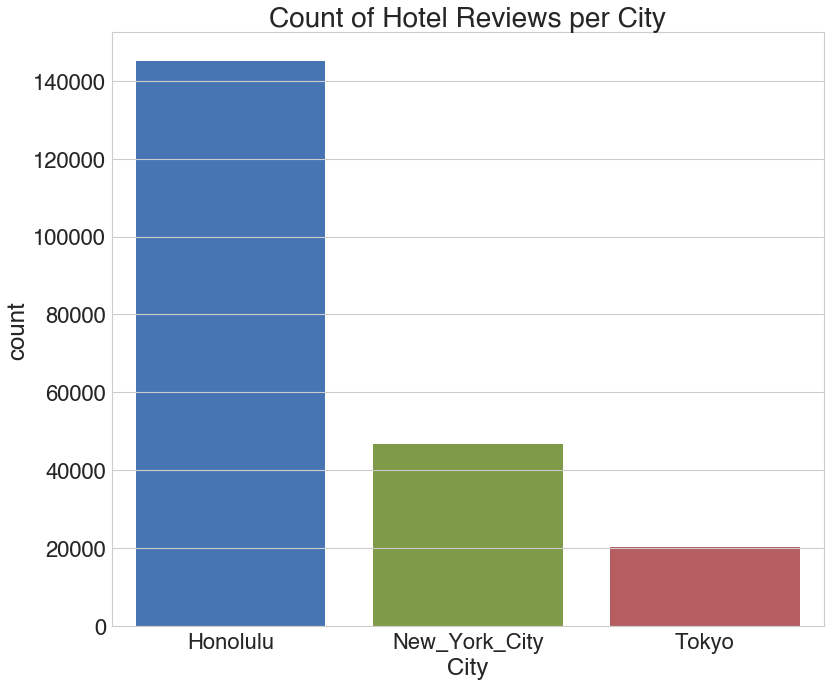

In [14]:
# Plot counts - Reviews per city
df = df_all_hotels_cleaned
print('Total Number of Reviews:', df.shape[0])

fig, ax = plt.subplots(figsize=(12,10))
plot = sns.countplot(data=df, x='City', ax=ax, order = df['City'].value_counts().index)
ax.set_title('Count of Hotel Reviews per City', size=BIGGEST_SIZE)
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/countplot_reviews_byCity_full')

Text(0.5, 1.0, 'Distribution of Ratings per City')

Text(0, 0.5, 'Hotel Rating')

Text(0.5, 0, 'City')

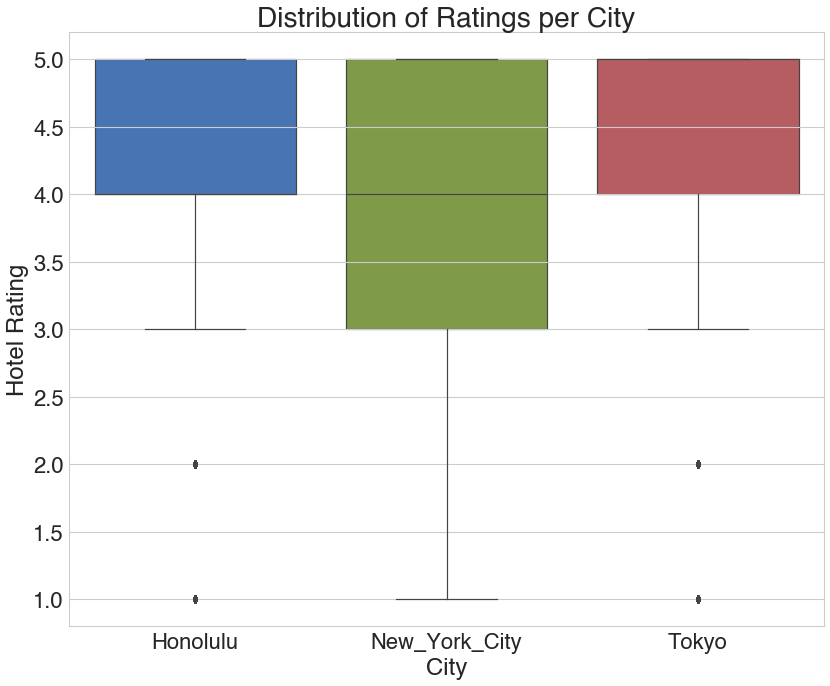

In [15]:
# Plot boxplot - Ratings per city
figsize=(12, 10)
fig, ax = plt.subplots(figsize=figsize)
plot = sns.boxplot(x='City', y='rating', data=df, ax=ax, order = df['City'].value_counts().index)
ax.set_title('Distribution of Ratings per City', size=BIGGEST_SIZE)
ax.set_ylabel('Hotel Rating')
ax.set_xlabel('City')
fig.tight_layout()
fig.savefig('../images/boxplt_ratings_byCity_full')

Total Number of Ratings:  212155


Text(0.5, 1.0, 'Counts of Hotel Ratings')

Text(0.5, 0, 'Hotel Rating')

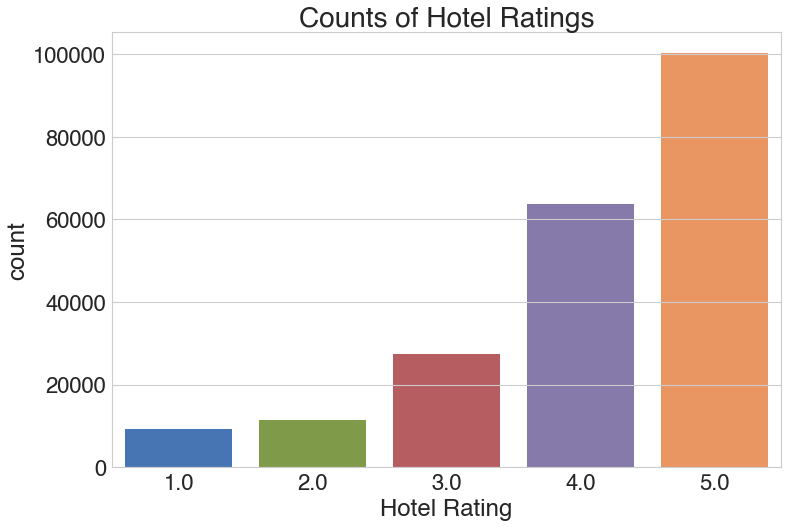

In [16]:
# Plot counts - Ratings
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(12,8))
plot = sns.countplot(data=df, x='rating', ax=ax)
ax.set_title('Counts of Hotel Ratings', size=BIGGEST_SIZE)
ax.set_xlabel('Hotel Rating')
fig.savefig('../images/countplot_ratings_full')

Total Number of Ratings:  212155


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1a2ab3c310>)

Text(0.5, 1, 'Balance of Review Sentiments')

Text(73.76, 0.5, '')

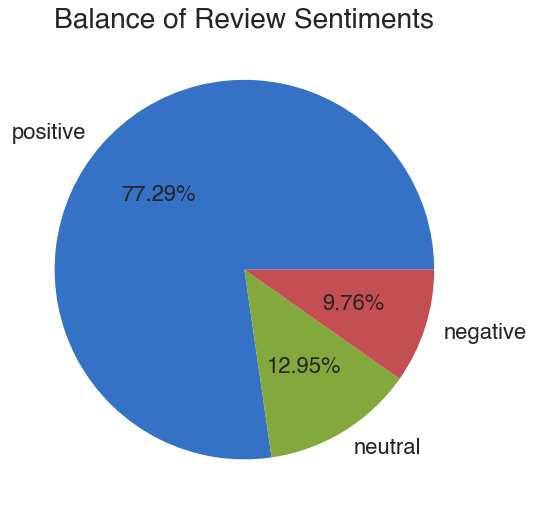

In [17]:
# Plot pie - Sentiments
df = df_all_hotels_cleaned
print('Total Number of Ratings: ', df.shape[0])

fig, ax = plt.subplots(figsize=(8,8))
hlp.plot_pie(df['sentiment'], fig, ax)
ax.set_title('Balance of Review Sentiments', size=BIGGEST_SIZE)
ax.set_ylabel('')
fig.savefig('../images/pie_sentiments_full')

# Train-Test Split

In [18]:
# Specify df & target, X & y
df = df_all_hotels_cleaned.copy()
target = 'sentiment'

X = df['review_body']
y = df[target].to_numpy()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((169724,), (42431,), (169724,), (42431,))

## Handling class imbalance by under-sampling train data

# NLP

In [20]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [21]:
df = df_all_hotels_cleaned

In [22]:
def build_text_vectorizer(contents, use_tfidf=True, use_stemmer=False, max_features=None):
    '''
    Build and return a **callable** for transforming text documents to vectors,
    as well as a vocabulary to map document-vector indices to words from the
    corpus. The vectorizer will be trained from the text documents in the
    `contents` argument. If `use_tfidf` is True, then the vectorizer will use
    the Tf-Idf algorithm, otherwise a Bag-of-Words vectorizer will be used.
    The text will be tokenized by words, and each word will be stemmed iff
    `use_stemmer` is True. If `max_features` is not None, then the vocabulary
    will be limited to the `max_features` most common words in the corpus.
    '''
    Vectorizer = TfidfVectorizer if use_tfidf else CountVectorizer
#     tokenizer = RegexpTokenizer(r"[\w']+")
    tokenizer = RegexpTokenizer(r"[a-zA-Z]+")
#     stem = PorterStemmer().stem if use_stemmer else (lambda x: x)
    if use_stemmer=='porter':  
        stem = PorterStemmer().stem
        print('Using PorterStemmer')
    elif use_stemmer=='snowball':    
        stem = SnowballStemmer('english').stem
        print('Using SnowballStemmer')
    elif use_stemmer=='lem':    
        stem = WordNetLemmatizer().lemmatize
        print('Using WordNetLemmatizer')
    else: 
        stem = (lambda x: x)
        print('No Stemmer')

    stop_set = set(stopwords.words('english'))

    # Closure over the tokenizer et al.
    def tokenize(text):
        tokens = tokenizer.tokenize(text)
        stems = [stem(token) for token in tokens if token not in stop_set]
        return stems

    vectorizer_model = Vectorizer(strip_accents='unicode', lowercase=True, 
                                  tokenizer=tokenize, max_features=max_features)
    vectorizer_model.fit(contents)
    vocabulary = np.array(vectorizer_model.get_feature_names())

    # Closure over the vectorizer_model's transform method.
    def vectorizer(X):
        return vectorizer_model.transform(X).toarray()

    return vectorizer, vocabulary

### Tf-idf, no stemmer, 200 max_features (filter English stopwords)

In [23]:
tfidf=True
stemmer=None
max_features=200

vect_tfidf_nostem_200, vocab_tfidf_nostem_200 = build_text_vectorizer(X_train,
                             use_tfidf=tfidf,
                             use_stemmer=stemmer,
                             max_features=max_features)

No Stemmer


In [24]:
Xtr_tfidf_nostem_200 = vect_tfidf_nostem_200(X_train)

In [25]:
vocab_tfidf_nostem_200

array(['access', 'across', 'also', 'although', 'always', 'amazing',
       'another', 'area', 'around', 'arrived', 'asked', 'available',
       'away', 'back', 'balcony', 'bar', 'bathroom', 'beach', 'beautiful',
       'bed', 'beds', 'best', 'better', 'big', 'bit', 'booked',
       'breakfast', 'business', 'busy', 'car', 'central', 'chairs',
       'check', 'city', 'clean', 'close', 'coffee', 'come', 'comfortable',
       'concierge', 'could', 'day', 'days', 'definitely', 'desk',
       'diamond', 'distance', 'door', 'early', 'easy', 'end', 'enjoyed',
       'enough', 'especially', 'etc', 'even', 'every', 'everything',
       'excellent', 'expensive', 'experience', 'family', 'fantastic',
       'feel', 'find', 'first', 'floor', 'food', 'found', 'free',
       'friendly', 'front', 'full', 'get', 'go', 'going', 'good', 'got',
       'great', 'guests', 'happy', 'hawaii', 'hawaiian', 'head',
       'helpful', 'high', 'hilton', 'honolulu', 'hotel', 'hotels',
       'however', 'kids', 'large

# Predictive Modeling

In [26]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import cross_val_score

In [27]:
Xtr_tfidf_nostem_200.shape

(169724, 200)

In [28]:
def fit_pred_score_Nfold(model, X_train, y_train, N=10, model_name=None, scoring='accuracy'):
    # Fit model
    model.fit(X_train, y_train)
    # Get N-fold Cross-Validation score
    if model_name is None:
        model_name=model.__class__.__name__
    score = np.mean(cross_val_score(model, X_train, y_train, scoring=scoring, cv=N))
    print(model_name + ' {}, {}-fold CV on Train Data: {:0.3f}'.format(scoring, N, score))

In [29]:
nb_def = MultinomialNB()

In [30]:
fit_pred_score_Nfold(nb_def, Xtr_tfidf_nostem_200, y_train, N=10)

MultinomialNB accuracy, 10-fold CV on Train Data: 0.782


# Appendix

In [31]:
# don't go beyond here with Run All
assert False

AssertionError: 

In [ ]:
# Plot distributions - Review length per sentiment
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per sentiment
for sentiment in df['sentiment'].unique():
    sns.distplot(df.groupby('sentiment').get_group(sentiment)['review_length'], ax=ax, label=sentiment)
ax.legend()

In [ ]:
# Plot distributions - Review length per city
df = df_all_hotels_cleaned

fig, ax = plt.subplots(figsize=(8,8))
# Plot per city
for city in df['City'].unique():
    sns.distplot(df.groupby('City').get_group(city)['review_length'], ax=ax, label=city)
ax.legend()